# <span style="color: Green; "> **Project: Using AIML and Backtesting to Trade in Stock market** </span> 


# <span style="color: Red; "> Big Picture of the Project and its process:  </span> 
    
### <span style="color: Blue; "> 1- Using AIML and Backtesting to Trade in Stock market </span> 

### <span style="color: Blue; "> 2- Structure designer of the project and Python code writer </span> 


### This code has user-friendly structure. We are working with time series and it is regression issue in machine learning and deep learning, as capstone project for `UC Berkeley- MFE-python-preprogram-2026`, written by `Reza Zamani`

### <span style="color: Blue; "> 3- Process of the project </span> 


#### <span style="color: Red; "> 1- Business Understanding (Problem statement, purposes, questions, methodology, steps, phases of project) </span> 


#### <span style="color: Red; "> 2- Data understanding </span> 
 
#### <span style="color: Red; "> 3- Feature Engineering </span> 
 
####  <span style="color: Red; "> 4- Train/Test split and handling imbalanced dataset <span style="color: blue; ">  </span> 
  
 #### <span style="color: Red; ">5- Machine learning models and their evaluation   </span>
  
####  <span style="color: Red; ">6- Comparison of Models performance, evaluation, best model</span>

 #### <span style="color: Red; ">7- Define Backtester</span>

  #### <span style="color: Red; ">8-  Running the Backtest</span>
  
####  <span style="color: Red; ">9- Visualization and Comparison of prediction with Benchmakr (S&P500)</span>

## Import libraries 

In [ ]:
# =============================================================================
# IMPORTS - CLEANED AND ORGANIZED
# =============================================================================

# Standard library imports
import sqlite3
import warnings
from datetime import datetime, timedelta
from dataclasses import dataclass, field
from typing import Dict, List, Optional, Protocol, Any

# Third-party imports - Data manipulation
import numpy as np
import pandas as pd

# Third-party imports - Machine Learning (sklearn)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Third-party imports - Deep Learning
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Third-party imports - Visualization
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')


# <span style="color: Green; "> Data Understandin  </span> 


## 1-1 Load Data

#### **Main data was SQL data (.db), we use DB Browser (SQ Lite) to downloas it and then export it as CSV file.then load it with pd.read_csv()**

In [69]:
df = pd.read_csv("D:\MFE PYTHNON\Python\signals.csv")
print(df.head())

         id symbol        date    open    high     low   close  volume  \
0  21615044    NWE  2015-01-07   56.05   56.18   55.36   56.10  403034   
1  19695936   OTTR  2015-01-05   30.74   31.06   30.61   30.85  102305   
2  18296479    TMP  2015-01-05   53.96   54.55   52.39   53.27   51510   
3  22028191   PKOH  2015-01-05   60.68   61.86   59.52   59.76   34422   
4  19588079   MRIN  2015-01-05  357.73  361.93  354.79  355.21    2065   

   adj_close  unadjusted_volume  ...      ebitda net_income_ttm   revenue_ttm  \
0      38.01             403034  ...  61439000.0    109610000.0  1.211006e+09   
1      22.82             102305  ...  43938000.0     59911000.0  9.506560e+08   
2      39.68              51510  ...  22601000.0     53643000.0  2.531120e+08   
3      50.24              34422  ...  32100000.0     43800000.0  1.315100e+09   
4     355.21               2065  ...  -6761000.0    -32402000.0  9.418100e+07   

   gross_profit_ttm   ebitda_ttm  operating_cash_flow  free_cash_flo

## 1-2 check the structure of data 

In [71]:
# copy of data base (df) is data, we want to have our origin df 
data = df.copy() 

In [72]:
# check the names of columns 
data.columns

Index(['id', 'symbol', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adj_close', 'unadjusted_volume', 'vwap', 'reported_currency',
       'number_of_shares', 'cash_and_short_term_investments',
       'total_current_assets', 'total_assets', 'short_term_debt',
       'long_term_debt', 'total_debt', 'net_debt', 'total_liabilities',
       'net_income', 'revenue', 'gross_profit', 'ebitda', 'net_income_ttm',
       'revenue_ttm', 'gross_profit_ttm', 'ebitda_ttm', 'operating_cash_flow',
       'free_cash_flow', 'free_cash_flow_ttm', 'operating_cash_flow_ttm',
       'market_cap'],
      dtype='object')

In [73]:
# check dimensions of data 
data.shape

(9697099, 34)

### we have around 330 million data 

In [74]:
# check head of data 
print (data.head(5))

         id symbol        date    open    high     low   close  volume  \
0  21615044    NWE  2015-01-07   56.05   56.18   55.36   56.10  403034   
1  19695936   OTTR  2015-01-05   30.74   31.06   30.61   30.85  102305   
2  18296479    TMP  2015-01-05   53.96   54.55   52.39   53.27   51510   
3  22028191   PKOH  2015-01-05   60.68   61.86   59.52   59.76   34422   
4  19588079   MRIN  2015-01-05  357.73  361.93  354.79  355.21    2065   

   adj_close  unadjusted_volume  ...      ebitda net_income_ttm   revenue_ttm  \
0      38.01             403034  ...  61439000.0    109610000.0  1.211006e+09   
1      22.82             102305  ...  43938000.0     59911000.0  9.506560e+08   
2      39.68              51510  ...  22601000.0     53643000.0  2.531120e+08   
3      50.24              34422  ...  32100000.0     43800000.0  1.315100e+09   
4     355.21               2065  ...  -6761000.0    -32402000.0  9.418100e+07   

   gross_profit_ttm   ebitda_ttm  operating_cash_flow  free_cash_flo

In [75]:
# check tial of dataset 
print (data.tail(5))

               id symbol        date    open      high       low   close  \
9697094  17598624   CLBT  2023-03-28    5.86    6.0286    5.7550    5.76   
9697095  23898123   MRCC  2023-03-28    7.64    7.7400    7.5100    7.55   
9697096  17943310   BLDP  2023-03-28    5.13    5.2200    5.1000    5.17   
9697097  17235017   EHTH  2023-03-28    8.28    8.6300    8.1546    8.23   
9697098  16722262    TFX  2023-03-28  246.14  248.8400  245.5800  246.36   

          volume  adj_close  unadjusted_volume  ...       ebitda  \
9697094    91959       5.76              92000  ...   12194000.0   
9697095    19219       6.20              19219  ...    4596000.0   
9697096  1829408       5.17            1829300  ...  -34281000.0   
9697097   302764       8.23             302600  ...   45092000.0   
9697098   244239     244.12             244239  ...  188078000.0   

        net_income_ttm   revenue_ttm  gross_profit_ttm   ebitda_ttm  \
9697094    120805000.0  2.706510e+08      2.199050e+08   102380

In [76]:
# change date to to_datetime and overwrite the column in place.
data["date"] = pd.to_datetime(data["date"])


In [77]:
print("data range (beginign and end)")
print(f"  first data: {data['date'].min()}")
print(f"  last date: {data['date'].max()}")

data range (beginign and end)
  first data: 2015-01-02 00:00:00
  last date: 2025-12-31 00:00:00


### we have data from beginign of 2015 to end of 2025 (11 years with daily dataset)

In [78]:
# check the number of companies (and indices), we check it with data ['symbol'].nunique 
print('Number of symbols:',  data['symbol'].nunique())

Number of symbols: 5417


In [79]:
# this shows we have 5417 symbol, which covers comanies name in market and also indices (such S&P 500)

In [80]:
# let check sum of  null data 
print(data.isnull().sum())

id                                     0
symbol                                 0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
adj_close                              0
unadjusted_volume                      0
vwap                                  20
reported_currency                   2462
number_of_shares                    2462
cash_and_short_term_investments     3796
total_current_assets                3796
total_assets                        3796
short_term_debt                     4889
long_term_debt                      3796
total_debt                          4889
net_debt                            4889
total_liabilities                   3796
net_income                          2462
revenue                             2462
gross_profit                        2462
ebitda          

### this shows we have null data and should make decision about them
### However, as target variable will created with `adj_close` and it does not have any null data, it is good finding 

# <span style="color: Green; "> Feature Engineering  </span> 


### 2-1- selecting related features and drop the others 

In [81]:
selected_features = [
    'symbol', 'date',
    
    # Price & Volume
    'adj_close', 'open', 'high', 'low', 'volume', 'vwap',
    
    # Fundamentals
    'market_cap', 'revenue_ttm', 'net_income_ttm', 
    'free_cash_flow_ttm', 'total_debt', 'total_assets'
]

data = data[selected_features]

In [82]:
# check agian the shape, unique and null data 

In [83]:
print("selected data now has:", data.shape, "dimension")
print ("=" * 60)
print("we check the null data:", data.isnull().sum())
print ("=" * 60)
print(" we check the number of uniques:", data['symbol'].nunique())  # How many stocks?

selected data now has: (9697099, 14) dimension
we check the null data: symbol                    0
date                      0
adj_close                 0
open                      0
high                      0
low                       0
volume                    0
vwap                     20
market_cap             2462
revenue_ttm            2462
net_income_ttm         2462
free_cash_flow_ttm    21233
total_debt             4889
total_assets           3796
dtype: int64
 we check the number of uniques: 5417


## 2-2 focus on valuable stock, which have good market cap, columen and its value is not very little 

**To make decision about valuabe stock, we need to define the period of train data set**

**we have 11 years daily data set, we chose 3 years as trainig data set (from  1-1-2015 to 31-12-2017)**

**Moreover, we need to be sure that we do not have dataleage, so we chose 6 months as gap, and then hoose our test set from 1-7-2018 to 31-12-2025**

In [84]:

# Define train period (first and last)
TRAIN_START = '2015-01-01'
TRAIN_END = '2017-12-31'

# create train data to calculate the average market cap 
train_data = data[
    (data['date'] >= TRAIN_START) & 
    (data['date'] <= TRAIN_END)
]

# we check the quality of markey cap, columen and price 
stock_quality = train_data.groupby('symbol').agg({
    'adj_close': 'mean',
    'market_cap': 'mean',
    'volume': 'mean'
}).reset_index()

# we define minimum for market cap, colume and price 
quality_stocks = stock_quality[
    (stock_quality['market_cap'] > 500_000_000) &  # > $500M
    (stock_quality['volume'] > 50_000) &            # Reasonable liquidity
    (stock_quality['adj_close'] > 10)              # No littel price 
]

# Step 3: Take top 50 by market cap 
top_50 = quality_stocks.nlargest(50, 'market_cap')['symbol']
print (top_50)

10      AAPL
1287    GOOG
2027    NFLX
1947    MSFT
3249     XOM
1847    META
176     AMZN
1599     JNJ
1604     JPM
3171     WFC
2197    ORLY
3196     WMT
2288      PG
461      BUD
3144      VZ
2624    SHEL
3070       V
319      BAC
2276     PFE
792      CVX
1651      KO
2195    ORCL
852      DIS
2114     NVS
2824       T
1357      HD
1426    HSBC
1525    INTC
2836     TBB
482        C
1937     MRK
1227      GE
2268     PEP
732     CSCO
2325      PM
1467     IBM
3031     UNH
1252    GILD
1912      MO
156     AMGN
2961     TTE
1786      MA
434       BP
1815     MCD
1834     MDT
14      ABBV
318       BA
2966     TTM
421      BMY
2656     SLB
Name: symbol, dtype: object


In [85]:
# Step 4: Filter  dataset only for top 50 symbols 
data = data[data['symbol'].isin(top_50)]

# Step 5: Verify
print(f"Selected qualified stocks: {data['symbol'].nunique()}")
print ("=" * 60)
print(f"Total rows: {len(data):}")
print ("=" * 60)
print(f"Sample stocks: {list(top_50[:10])}")

Selected qualified stocks: 50
Total rows: 134591
Sample stocks: ['AAPL', 'GOOG', 'NFLX', 'MSFT', 'XOM', 'META', 'AMZN', 'JNJ', 'JPM', 'WFC']


### Now we have valuable stocks and also related feautres after steps 2-1 and 2-2

## 2-3- check again null data and also duplicated data 

In [86]:
print('number of null data in each feature:', data.isnull().sum())
print('=' * 60)
print('number of na is data set:', data.isna().sum())
print('=' * 60)

number of null data in each feature: symbol                0
date                  0
adj_close             0
open                  0
high                  0
low                   0
volume                0
vwap                  0
market_cap            0
revenue_ttm           0
net_income_ttm        0
free_cash_flow_ttm    0
total_debt            0
total_assets          0
dtype: int64
number of na is data set: symbol                0
date                  0
adj_close             0
open                  0
high                  0
low                   0
volume                0
vwap                  0
market_cap            0
revenue_ttm           0
net_income_ttm        0
free_cash_flow_ttm    0
total_debt            0
total_assets          0
dtype: int64


In [87]:
# Check for duplicates in rows (numbers, date or symbols) 

# Check for exact duplicate umbers
print("=" * 50)
print("EXACT DUPLICATE ROWS")
duplicate_rows = data.duplicated()
print(f"Number of exact duplicate rows: {duplicate_rows.sum()}")

if duplicate_rows.sum() > 0:
    print("\nSample duplicate rows:")
    print(data[duplicate_rows].head())
    
# Check for duplicate symbol or date 
print("\n" + "=" * 50)
print("DUPLICATE (SYMBOL, DATE) PAIRS")
duplicate_symbol_date = data.duplicated(subset=['symbol', 'date'], keep=False)
print(f"Number of duplicate (symbol, date) : {duplicate_symbol_date.sum()}")

if duplicate_symbol_date.sum() > 0:
    print("\nShowing all duplicates for first affected symbol:")
    first_dup_symbol = data[duplicate_symbol_date]['symbol'].iloc[0]
    print(data[(data['symbol'] == first_dup_symbol) & duplicate_symbol_date])
    
    # Show summary by symbol
    dup_summary = data[duplicate_symbol_date].groupby('symbol').size().sort_values(ascending=False)
    print(f"\nTop 10 symbols with most duplicates:")
    print(dup_summary.head(10))

#Check for duplicate dates within each symbol
print ("\n")
print("=" * 60)
print("DUPLICATE DATES PER SYMBOL")
duplicates_per_symbol = data.groupby('symbol')['date'].apply(
    lambda x: x.duplicated().sum()
)
symbols_with_dups = duplicates_per_symbol[duplicates_per_symbol > 0]

print(f"Number of symbols with duplicate dates: {len(symbols_with_dups)}")
if len(symbols_with_dups) > 0:
    print("\nSymbols with duplicate dates:")
    print(symbols_with_dups.sort_values(ascending=False))

EXACT DUPLICATE ROWS
Number of exact duplicate rows: 0

DUPLICATE (SYMBOL, DATE) PAIRS
Number of duplicate (symbol, date) : 0


DUPLICATE DATES PER SYMBOL
Number of symbols with duplicate dates: 0


### Now our data set is clean and ready to create some new indices which can be used as features which affect target 

## 2-4- Creating new featurres (financial indices) to use them in target prediction 

In [88]:
# Sort data first (important for time-series operations)
data = data.sort_values(['symbol', 'date']).reset_index(drop=True)

print ("=" * 60)
print("we start creating financial indices as new features\n")

# ============================================
# 1. VALUATION RATIOS
# ============================================
print("  - Valuation ratios...\n")

# Price-to-Earnings
data['pe_ratio'] = data['market_cap'] / data['net_income_ttm']
data['pe_ratio'] = data['pe_ratio'].replace([np.inf, -np.inf], np.nan)
print("    Created: pe_ratio\n")

# Price-to-Book
data['book_value'] = data['total_assets'] - data['total_debt']
print("    Created: book_value\n")
data['pb_ratio'] = data['market_cap'] / data['book_value']
data['pb_ratio'] = data['pb_ratio'].replace([np.inf, -np.inf], np.nan)
print("    Created: pb_ratio\n")

# Debt-to-Equity
data['debt_to_equity'] = data['total_debt'] / data['book_value']
data['debt_to_equity'] = data['debt_to_equity'].replace([np.inf, -np.inf], np.nan)
print("    Created: debt_to_equity\n")

# Free Cash Flow Yield
data['fcf_yield'] = data['free_cash_flow_ttm'] / data['market_cap']
data['fcf_yield'] = data['fcf_yield'].replace([np.inf, -np.inf], np.nan)
print("    Created: fcf_yield\n")

# ============================================
# 2. MOMENTUM FEATURES (Past Returns)
# ============================================
print("  - Momentum features...\n")

# Various momentum windows
data['return_5d'] = data.groupby('symbol')['adj_close'].pct_change(5)
print("    Created: return_5d\n")
data['return_10d'] = data.groupby('symbol')['adj_close'].pct_change(10)
print("    Created: return_10d\n")
data['return_20d'] = data.groupby('symbol')['adj_close'].pct_change(20)
print("    Created: return_20d\n")
data['return_60d'] = data.groupby('symbol')['adj_close'].pct_change(60)
print("    Created: return_60d\n")

# Acceleration (momentum of momentum)
data['momentum_acceleration'] = data['return_20d'] - data['return_60d']
print("    Created: momentum_acceleration\n")

# ============================================
# 3. VOLATILITY FEATURES
# ============================================
print("  - Volatility features...\n")

# Rolling volatility (std of daily returns)
daily_returns = data.groupby('symbol')['adj_close'].pct_change()
data['volatility_20d'] = daily_returns.groupby(data['symbol']).rolling(20).std().reset_index(0, drop=True)
print("    Created: volatility_20d\n")
data['volatility_60d'] = daily_returns.groupby(data['symbol']).rolling(60).std().reset_index(0, drop=True)
print("    Created: volatility_60d\n")

# Volatility ratio (recent vs long-term)
data['volatility_ratio'] = data['volatility_20d'] / data['volatility_60d']
data['volatility_ratio'] = data['volatility_ratio'].replace([np.inf, -np.inf], np.nan)
print("    Created: volatility_ratio\n")

# Daily range as volatility measure
data['daily_range'] = (data['high'] - data['low']) / data['adj_close']
data['daily_range'] = data['daily_range'].replace([np.inf, -np.inf], np.nan)
print("    Created: daily_range\n")

# Average True Range (ATR) - simplified
data['atr_14d'] = data.groupby('symbol')['daily_range'].rolling(14).mean().reset_index(0, drop=True)
print("    Created: atr_14d\n")

# ============================================
# 4. VOLUME FEATURES
# ============================================
print("  - Volume features...\n")

# Volume relative to recent average
data['volume_ma_20'] = data.groupby('symbol')['volume'].rolling(20).mean().reset_index(0, drop=True)
print("    Created: volume_ma_20\n")
data['volume_ratio'] = data['volume'] / data['volume_ma_20']
data['volume_ratio'] = data['volume_ratio'].replace([np.inf, -np.inf], np.nan)
print("    Created: volume_ratio\n")

# Volume trend
data['volume_trend'] = data.groupby('symbol')['volume'].pct_change(20)
print("    Created: volume_trend\n")

# Dollar volume (price × volume) - liquidity measure
data['dollar_volume'] = data['adj_close'] * data['volume']
print("    Created: dollar_volume\n")
data['dollar_volume_ma_20'] = data.groupby('symbol')['dollar_volume'].rolling(20).mean().reset_index(0, drop=True)
print("    Created: dollar_volume_ma_20\n")

# ============================================
# 5. PRICE PATTERNS & TECHNICAL INDICATORS
# ============================================
print("  - Price patterns & technical indicators...\n")

# Moving average crossovers
data['ma_50'] = data.groupby('symbol')['adj_close'].rolling(50).mean().reset_index(0, drop=True)
print("    Created: ma_50\n")

# ============================================
# 6. FINANCIAL HEALTH METRICS
# ============================================
print("  - Financial health...\n")

# Return on Equity (ROE)
data['roe'] = data['net_income_ttm'] / data['book_value']
data['roe'] = data['roe'].replace([np.inf, -np.inf], np.nan)
print("    Created: roe\n")

# Revenue growth (YoY if available, or use trend)
data['revenue_growth'] = data.groupby('symbol')['revenue_ttm'].pct_change(63)  # ~quarterly
print("    Created: revenue_growth\n")

# Profit margin
data['profit_margin'] = data['net_income_ttm'] / data['revenue_ttm']
data['profit_margin'] = data['profit_margin'].replace([np.inf, -np.inf], np.nan)
print("    Created: profit_margin\n")

# ============================================
# 7. MEAN REVERSION INDICATORS
# ============================================
print("  - Mean reversion indicators...\n")

# RSI-like (relative strength)
gains = daily_returns.clip(lower=0)
losses = -daily_returns.clip(upper=0)
avg_gain = gains.groupby(data['symbol']).rolling(14).mean().reset_index(0, drop=True)
avg_loss = losses.groupby(data['symbol']).rolling(14).mean().reset_index(0, drop=True)
rs = avg_gain / avg_loss
data['rsi_14'] = 100 - (100 / (1 + rs))
print("    Created: rsi_14\n")

# Z-score of price (how many std devs from mean)
data['price_zscore'] = (
    (data['adj_close'] - data['ma_50']) / 
    data.groupby('symbol')['adj_close'].rolling(50).std().reset_index(0, drop=True)
)
data['price_zscore'] = data['price_zscore'].replace([np.inf, -np.inf], np.nan)
print("    Created: price_zscore\n")

# ============================================
# 8. RISK-ADJUSTED RETURNS
# ============================================
print("  - Risk-adjusted metrics...\n")

# Sharpe-like ratio (return / volatility)
data['return_to_vol_20d'] = data['return_20d'] / data['volatility_20d']
print("    Created: return_to_vol_20d\n")
data['return_to_vol_60d'] = data['return_60d'] / data['volatility_60d']
print("    Created: return_to_vol_60d\n")

data['return_to_vol_20d'] = data['return_to_vol_20d'].replace([np.inf, -np.inf], np.nan)
data['return_to_vol_60d'] = data['return_to_vol_60d'].replace([np.inf, -np.inf], np.nan)

print("\nFeature engineering complete!\n")
#print(f"Total features: {len(data.columns)}\n")

we start creating financial indices as new features

  - Valuation ratios...

    Created: pe_ratio

    Created: book_value

    Created: pb_ratio

    Created: debt_to_equity

    Created: fcf_yield

  - Momentum features...

    Created: return_5d

    Created: return_10d

    Created: return_20d

    Created: return_60d

    Created: momentum_acceleration

  - Volatility features...

    Created: volatility_20d

    Created: volatility_60d

    Created: volatility_ratio

    Created: daily_range

    Created: atr_14d

  - Volume features...

    Created: volume_ma_20

    Created: volume_ratio

    Created: volume_trend

    Created: dollar_volume

    Created: dollar_volume_ma_20

  - Price patterns & technical indicators...

    Created: ma_50

  - Financial health...

    Created: roe

    Created: revenue_growth

    Created: profit_margin

  - Mean reversion indicators...

    Created: rsi_14

    Created: price_zscore

  - Risk-adjusted metrics...

    Created: return_to_vol_

In [89]:
# ============================================
# AGAIN DATA CLEANING, BEFORE LM MODELING 
# ============================================
print(f"All nulls: {data.isnull().sum()}")

# ============================================
# HANDLE MISSING VALUES
# ============================================

# Rolling Statistics

rows_before = len(data)
cleaned_data = data.dropna(subset=['return_60d', 'volatility_60d'])
#print(f"  Removed {rows_before - len(cleaned_data):,} rows (early data with insufficient history)")


# HANDLE RATIO/DIVISION FEATURES
# ============================================
#print("\n--- Ratio Features (can have inf/nan from division --> have all been converted to nan already) ---")

# P/B Ratio and Debt-to-Equity - related to book value
# If book value is negative or zero, these ratios are meaningless

cleaned_data = cleaned_data.dropna(subset=['pb_ratio', 'debt_to_equity', 'roe'])

# Revenue Growth nulls

cleaned_data = cleaned_data.dropna(subset=['revenue_growth'])

# ============================================
# 4. FINAL CHECK
# ============================================
print("\n--- Cleaning Summary ---")
print(f"DATA AFTER CLEAING HAS SHAPE: {cleaned_data.shape}")
# print(f"Date range: {data['date'].min()} to {data['date'].max()}")
print(f"NOW WE HAVE STOCK: {cleaned_data['symbol'].nunique()}")

print("\n WE CHECK AGAIN NULL:")
print(cleaned_data.isnull().sum()[cleaned_data.isnull().sum() > 0])

print("\FINAL DATA CLEANING DONE")


All nulls: symbol                      0
date                        0
adj_close                   0
open                        0
high                        0
low                         0
volume                      0
vwap                        0
market_cap                  0
revenue_ttm                 0
net_income_ttm              0
free_cash_flow_ttm          0
total_debt                  0
total_assets                0
pe_ratio                    0
book_value                  0
pb_ratio                 1450
debt_to_equity           1450
fcf_yield                   0
return_5d                 250
return_10d                500
return_20d               1000
return_60d               3000
momentum_acceleration    3000
volatility_20d           1000
volatility_60d           3000
volatility_ratio         3000
daily_range                 0
atr_14d                   650
volume_ma_20              950
volume_ratio              950
volume_trend             1000
dollar_volume               0

# <span style="color: Green; "> PART 2 - DATA PREPARATION, DATA SPLIT AND MODEL SELECTION  </span> 


### TRAIN: FROM      2015-1-1      TO       2017-12-31
### GAP:  FROM       2018-1-1      TO       2018-6-30
###### TO PREVENT FROM DATA LEAKAGE 
### TEST: FROM       2018-7-1      TO       2025-12-31

In [90]:
# ============================================
# MODEL BUILDING - PREDICT 90-DAY RETURNS
# ============================================

# ============================================
# STEP 1: CREATE TARGET VARIABLE
# ============================================
#print("Creating target variable (90-day forward return)...")

# at first sort by symbol and date
cleaned_data = cleaned_data.sort_values(['symbol', 'date']).reset_index(drop=True)

# Calculate 90-day forward return
# shift(-90) means we're looking 90 days into the future
cleaned_data['target'] = cleaned_data.groupby('symbol')['adj_close'].pct_change(90).shift(-90)

# Check how much data we have
print(f"Total rows: {len(cleaned_data):,}")
print(f"Rows with valid targets: {cleaned_data['target'].notna().sum():,}")
print(f"Target created! (Last 90 days per stock will be null)")

Total rows: 129,994
Rows with valid targets: 125,494
Target created! (Last 90 days per stock will be null)


In [91]:
# ============================================
# STEP 2: DEFINE TRAIN/TEST PERIODS
# ============================================

TRAIN_START = '2015-01-01'
TRAIN_END = '2017-12-31'
GAP_END = '2018-06-31'      # 6-month gap to prevent leakage
TEST_START = '2018-07-01'
TEST_END = '2025-12-31'

# Create train/test sets (TIME-BASED, NOT RANDOM!)
train = cleaned_data[
    (cleaned_data['date'] >= TRAIN_START) & 
    (cleaned_data['date'] <= TRAIN_END) &
    (cleaned_data['target'].notna())  # Only keep rows with valid targets
].copy()

test = cleaned_data[
    (cleaned_data['date'] >= TEST_START) & 
    (cleaned_data['date'] <= TEST_END) &
    (cleaned_data['target'].notna())
].copy()

print ("=" * 60 )
print(f"Training duration: {TRAIN_START} to {TRAIN_END}")
print(f"  Train rows: {len(train):,}")
print(f"  Train stocks: {train['symbol'].nunique()}")
print ("=" * 60 )

print(f"\nTest duration: {TEST_START} to {TEST_END}")
print(f"  Test rows: {len(test):,}")
print(f"  Test stocks: {test['symbol'].nunique()}")

Training duration: 2015-01-01 to 2017-12-31
  Train rows: 32,838
  Train stocks: 48

Test duration: 2018-07-01 to 2025-12-31
  Test rows: 86,720
  Test stocks: 50


In [117]:
# ============================================
# STEP 3: PREPARE FEATURES
# ============================================
print("\n--- Preparing Features ---")

# Define feature columns (exclude identifiers and target)
exclude_cols = ['symbol', 'date', 'target', 'adj_close', 'open', 'high', 'low', 
                'volume', 'vwap', 'market_cap', 'revenue_ttm', 'net_income_ttm',
                'free_cash_flow_ttm', 'total_debt', 'total_assets', 'book_value',
                'debt_to_equity', 'return_5d', 'return_10d', 'momentum_acceleration',
                'volatility_ratio', 'daily_range', 'atr_14d', 'volume_ma_20', 'dollar_volume',
                'dollar_volume_ma_20', 'ma_50', 'price_zscore', 'return_to_vol_60d']

feature_cols = [col for col in data.columns if col not in exclude_cols]

print(f"Number of features: {len(feature_cols)}")
print(f"Features: {feature_cols}")

# Separate features and target
X_train = train[feature_cols]
y_train = train['target']

X_test = test[feature_cols]
y_test = test['target']

X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y = pd.concat([y_train, y_test], axis=0, ignore_index=True)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"\nX shape: {X.shape}")
print(f"\ny shape: {y.shape}")






--- Preparing Features ---
Number of features: 14
Features: ['pe_ratio', 'pb_ratio', 'fcf_yield', 'return_20d', 'return_60d', 'volatility_20d', 'volatility_60d', 'volume_ratio', 'volume_trend', 'roe', 'revenue_growth', 'profit_margin', 'rsi_14', 'return_to_vol_20d']

X_train shape: (32838, 14)
X_test shape: (86720, 14)

X shape: (119558, 14)

y shape: (119558,)


#  MODEL SELECTION

## we use following models: 
## 1- Ridge
## 2- Lasso
## 3- Random Forest
## 4- XGBoost
## 5_ LSTM 

### at first we define models, then apply them to data set, get prediction, then evaluate the models and finally choos the best model 

In [104]:
print("="*60)
print("MACHINE LEARNING PIPELINE - MODEL COMPARISON")
print("="*60)

MACHINE LEARNING PIPELINE - MODEL COMPARISON


In [119]:
# ====================================================
# CRITICAL FIX: Convert to numpy arrays to avoid index errors
# ====================================================
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"\nData shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}\n")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# FIX: Use numpy concatenation instead of pd.concat
X_scaled = np.vstack([X_train_scaled, X_test_scaled])

print(f"X_scaled shape: {X_scaled.shape}")



Data shapes:
  X_train: (32838, 14)
  X_test: (86720, 14)
  y_train: (32838,)
  y_test: (86720,)

X_scaled shape: (119558, 14)


In [106]:

# ============================================
# 2. MODEL TRAINING & EVALUATION
# ============================================

# Dictionary to store results
results = {}

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display model metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Calculate directional accuracy (did we predict the right direction?)
    direction_accuracy = np.mean((y_true > 0) == (y_pred > 0)) * 100
    
    print(f"\n{model_name} Performance:")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R²: {r2:.6f}")
    print(f"  Directional Accuracy: {direction_accuracy:.2f}%\n")
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Direction_Accuracy': direction_accuracy
    }


In [107]:

# ============================================
# MODEL 1: RIDGE REGRESSION
# ============================================
print("\n" + "="*60)
print("[2] Training Ridge Regression...")
print("="*60)

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

results['Ridge'] = evaluate_model(y_test, ridge_pred, 'Ridge Regression')



[2] Training Ridge Regression...

Ridge Regression Performance:
  RMSE: 0.187150
  MAE: 0.126259
  R²: -0.075480
  Directional Accuracy: 61.06%



In [108]:

# ============================================
# MODEL 2: LASSO REGRESSION
# ============================================
print("\n" + "="*60)
print("[3] Training Lasso Regression...")
print("="*60)

lasso = Lasso(alpha=0.001, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

results['Lasso'] = evaluate_model(y_test, lasso_pred, 'Lasso Regression')

# Feature importance from Lasso
non_zero_features = np.sum(lasso.coef_ != 0)
print(f"Lasso selected {non_zero_features} out of {X_train.shape[1]} features\n")


[3] Training Lasso Regression...

Lasso Regression Performance:
  RMSE: 0.188194
  MAE: 0.125815
  R²: -0.087509
  Directional Accuracy: 61.36%

Lasso selected 11 out of 14 features



In [109]:


# ============================================
# MODEL 3: XGBOOST
# ============================================
print("\n" + "="*60)
print("[4] Training XGBoost...")
print("="*60)

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

results['XGBoost'] = evaluate_model(y_test, xgb_pred, 'XGBoost')


[4] Training XGBoost...

XGBoost Performance:
  RMSE: 0.186200
  MAE: 0.128325
  R²: -0.064585
  Directional Accuracy: 58.70%



In [110]:


# ============================================
# MODEL 4: RANDOM FOREST
# ============================================
print("\n" + "="*60)
print("[5] Training Random Forest...")
print("="*60)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

results['RandomForest'] = evaluate_model(y_test, rf_pred, 'Random Forest')


[5] Training Random Forest...

Random Forest Performance:
  RMSE: 0.185775
  MAE: 0.127520
  R²: -0.059734
  Directional Accuracy: 59.76%



In [120]:

# ============================================
# MODEL 5: LSTM
# ============================================
print("\n" + "="*60)
print("[6] Training LSTM...")
print("="*60)

# Reshape data for LSTM (samples, timesteps, features)
# Using lookback window of 10 days
lookback = 10

def create_sequences(X_scaled, y, lookback):
    """
    Create sequences for LSTM - COMPLETELY FIXED VERSION
    This ensures we work with numpy arrays and use correct indexing
    """
    # Ensure inputs are numpy arrays
    X_scaled = np.array(X_scaled)
    y = np.array(y)
    
    Xs, ys = [], []
    
    # Start from 'lookback' position to avoid negative indices
    for i in range(lookback, len(X_scaled)):
        # Take the previous 'lookback' timesteps as input sequence
        Xs.append(X_scaled[i-lookback:i])
        # Take the current timestep as the target
        ys.append(y[i])
    return np.array(Xs), np.array(ys)
        
    # Create sequences - NOW WITH PROPER INDEXING
X_train_lstm, y_train_lstm = create_sequences(X_train_scaled, y_train, lookback)
X_test_lstm, y_test_lstm = create_sequences(X_test_scaled, y_test, lookback)

print(f"LSTM Train shape: {X_train_lstm.shape}\n")
print(f"LSTM Test shape: {X_test_lstm.shape}\n")

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(lookback, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train LSTM
print("Training LSTM (this may take a few minutes)...\n")
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

print(f"Training completed in {len(history.history['loss'])} epochs\n")

# Predict
lstm_pred = lstm_model.predict(X_test_lstm, verbose=0).flatten()

results['LSTM'] = evaluate_model(y_test_lstm, lstm_pred, 'LSTM')


[6] Training LSTM...
LSTM Train shape: (32828, 10, 14)

LSTM Test shape: (86710, 10, 14)

Training LSTM (this may take a few minutes)...

Training completed in 11 epochs


LSTM Performance:
  RMSE: 1.197054
  MAE: 0.172032
  R²: -42.995353
  Directional Accuracy: 60.80%



In [121]:
# ============================================
# 3. COMPARE ALL MODELS
# ============================================
print("\n" + "="*60)
print("[7] MODEL COMPARISON SUMMARY")
print("="*60 + "\n")

# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(6)

print(comparison_df)
print("\n")

# Find best model for each metric
print("Best Models by Metric:")
print(f"  Lowest RMSE: {comparison_df['RMSE'].idxmin()} ({comparison_df['RMSE'].min():.6f})")
print(f"  Lowest MAE: {comparison_df['MAE'].idxmin()} ({comparison_df['MAE'].min():.6f})")
print(f"  Highest R²: {comparison_df['R2'].idxmax()} ({comparison_df['R2'].max():.6f})")
print(f"  Highest Direction Accuracy: {comparison_df['Direction_Accuracy'].idxmax()} ({comparison_df['Direction_Accuracy'].max():.2f}%)")

# Overall best model (based on R²)
best_model = comparison_df['R2'].idxmax()
print(f"\n{'*'*60}")
print(f"OVERALL BEST MODEL: {best_model}")
print(f"{'*'*60}\n")



[7] MODEL COMPARISON SUMMARY

                  RMSE       MAE         R2  Direction_Accuracy
Ridge         0.187150  0.126259  -0.075480           61.057426
Lasso         0.188194  0.125815  -0.087509           61.358395
XGBoost       0.186200  0.128325  -0.064585           58.701568
RandomForest  0.185775  0.127520  -0.059734           59.757841
LSTM          1.197054  0.172032 -42.995353           60.803829


Best Models by Metric:
  Lowest RMSE: RandomForest (0.185775)
  Lowest MAE: Lasso (0.125815)
  Highest R²: RandomForest (-0.059734)
  Highest Direction Accuracy: Lasso (61.36%)

************************************************************
OVERALL BEST MODEL: RandomForest
************************************************************




[8] Creating visualizations...

Visualization saved as 'model_comparison.png'



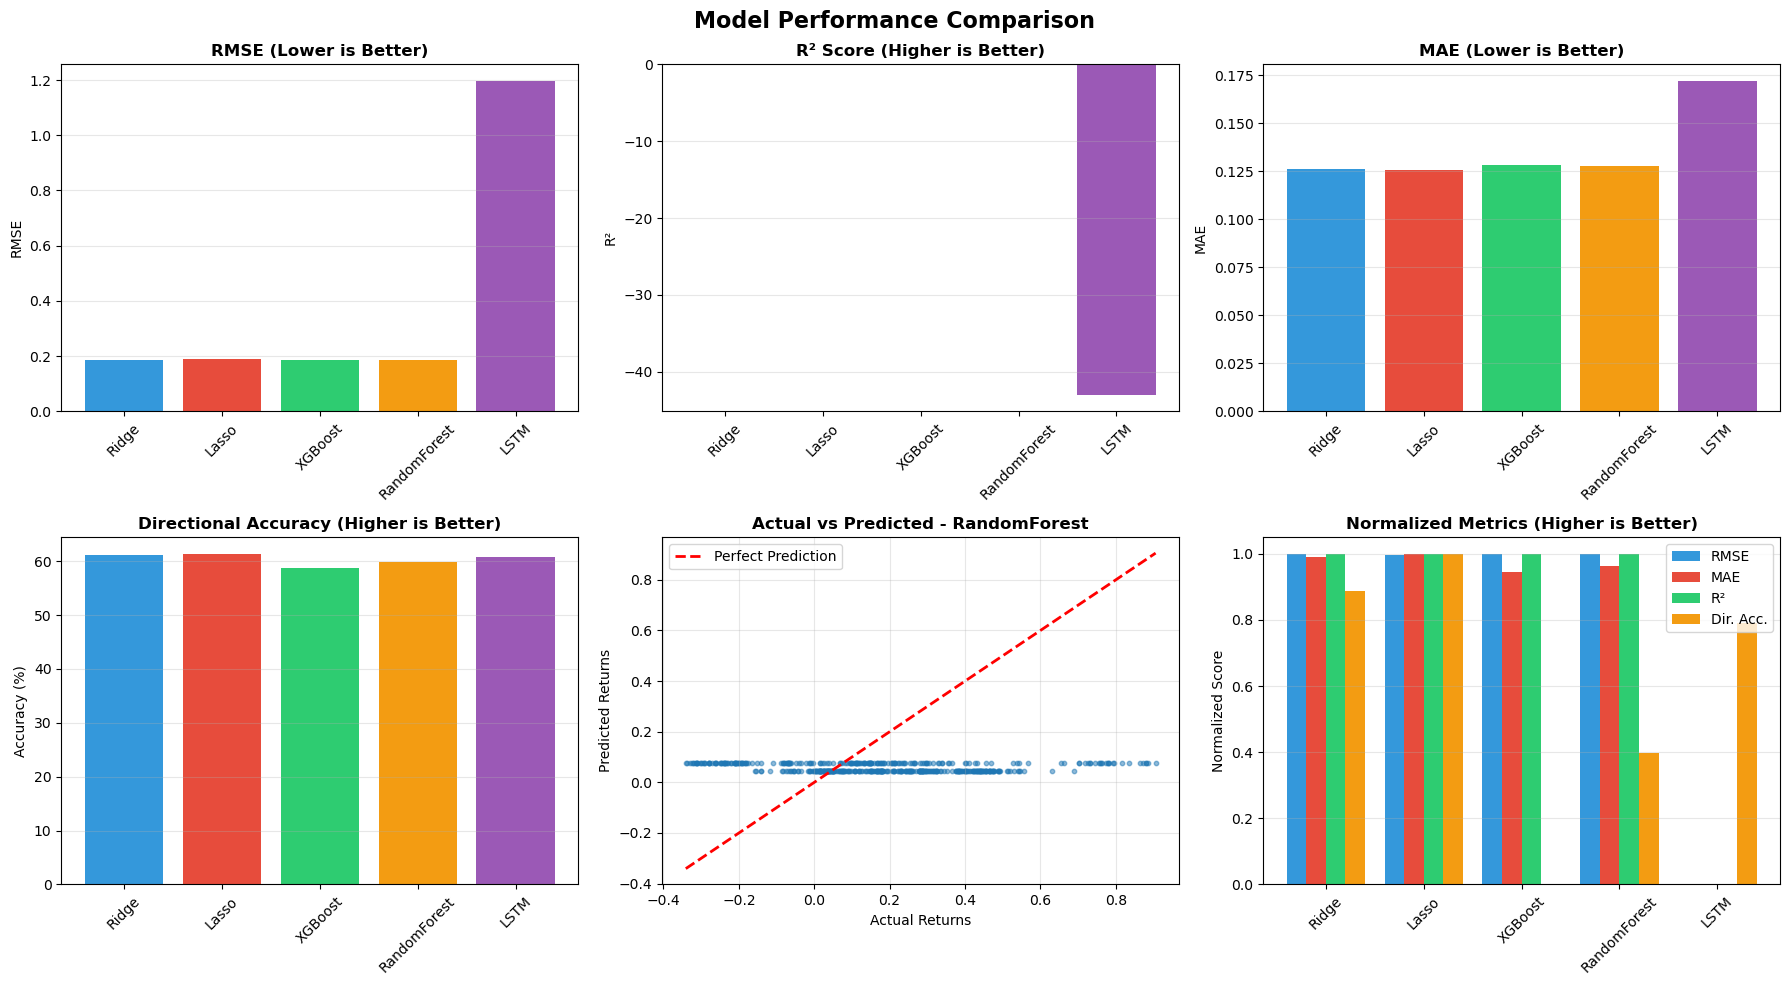


[9] Saving Best Model...

Random Forest model saved as 'best_model_randomforest.pkl'

PIPELINE COMPLETE!


In [122]:

# ============================================
# 4. VISUALIZE RESULTS
# ============================================
print("\n[8] Creating visualizations...\n")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# Plot 1: RMSE Comparison
axes[0, 0].bar(comparison_df.index, comparison_df['RMSE'], color=colors)
axes[0, 0].set_title('RMSE (Lower is Better)', fontweight='bold')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: R² Comparison
axes[0, 1].bar(comparison_df.index, comparison_df['R2'], color=colors)
axes[0, 1].set_title('R² Score (Higher is Better)', fontweight='bold')
axes[0, 1].set_ylabel('R²')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: MAE Comparison
axes[0, 2].bar(comparison_df.index, comparison_df['MAE'], color=colors)
axes[0, 2].set_title('MAE (Lower is Better)', fontweight='bold')
axes[0, 2].set_ylabel('MAE')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# Plot 4: Directional Accuracy
axes[1, 0].bar(comparison_df.index, comparison_df['Direction_Accuracy'], color=colors)
axes[1, 0].set_title('Directional Accuracy (Higher is Better)', fontweight='bold')
axes[1, 0].set_ylabel('Accuracy (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 5: Actual vs Predicted for best model
if best_model == 'LSTM':
    y_test_plot = y_test_lstm[:500] if len(y_test_lstm) > 500 else y_test_lstm
    y_pred_plot = lstm_pred[:500] if len(lstm_pred) > 500 else lstm_pred
elif best_model == 'XGBoost':
    y_test_plot = y_test[:500] if len(y_test) > 500 else y_test
    y_pred_plot = xgb_pred[:500] if len(xgb_pred) > 500 else xgb_pred
elif best_model == 'RandomForest':
    y_test_plot = y_test[:500] if len(y_test) > 500 else y_test
    y_pred_plot = rf_pred[:500] if len(rf_pred) > 500 else rf_pred
elif best_model == 'Ridge':
    y_test_plot = y_test[:500] if len(y_test) > 500 else y_test
    y_pred_plot = ridge_pred[:500] if len(ridge_pred) > 500 else ridge_pred
else:  # Lasso
    y_test_plot = y_test[:500] if len(y_test) > 500 else y_test
    y_pred_plot = lasso_pred[:500] if len(lasso_pred) > 500 else lasso_pred

axes[1, 1].scatter(y_test_plot, y_pred_plot, alpha=0.5, s=10)
axes[1, 1].plot([y_test_plot.min(), y_test_plot.max()], 
                [y_test_plot.min(), y_test_plot.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_title(f'Actual vs Predicted - {best_model}', fontweight='bold')
axes[1, 1].set_xlabel('Actual Returns')
axes[1, 1].set_ylabel('Predicted Returns')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Plot 6: All metrics normalized comparison
normalized_df = comparison_df.copy()

# Normalize metrics to 0-1 scale (higher is better for all) with safety checks
if normalized_df['RMSE'].max() != normalized_df['RMSE'].min():
    normalized_df['RMSE'] = 1 - (normalized_df['RMSE'] - normalized_df['RMSE'].min()) / (normalized_df['RMSE'].max() - normalized_df['RMSE'].min())
else:
    normalized_df['RMSE'] = 0.5

if normalized_df['MAE'].max() != normalized_df['MAE'].min():
    normalized_df['MAE'] = 1 - (normalized_df['MAE'] - normalized_df['MAE'].min()) / (normalized_df['MAE'].max() - normalized_df['MAE'].min())
else:
    normalized_df['MAE'] = 0.5

if normalized_df['R2'].max() != normalized_df['R2'].min():
    normalized_df['R2'] = (normalized_df['R2'] - normalized_df['R2'].min()) / (normalized_df['R2'].max() - normalized_df['R2'].min())
else:
    normalized_df['R2'] = 0.5

if normalized_df['Direction_Accuracy'].max() != normalized_df['Direction_Accuracy'].min():
    normalized_df['Direction_Accuracy'] = (normalized_df['Direction_Accuracy'] - normalized_df['Direction_Accuracy'].min()) / (normalized_df['Direction_Accuracy'].max() - normalized_df['Direction_Accuracy'].min())
else:
    normalized_df['Direction_Accuracy'] = 0.5

x = np.arange(len(comparison_df))
width = 0.2

axes[1, 2].bar(x - 1.5*width, normalized_df['RMSE'], width, label='RMSE', color='#3498db')
axes[1, 2].bar(x - 0.5*width, normalized_df['MAE'], width, label='MAE', color='#e74c3c')
axes[1, 2].bar(x + 0.5*width, normalized_df['R2'], width, label='R²', color='#2ecc71')
axes[1, 2].bar(x + 1.5*width, normalized_df['Direction_Accuracy'], width, label='Dir. Acc.', color='#f39c12')

axes[1, 2].set_title('Normalized Metrics (Higher is Better)', fontweight='bold')
axes[1, 2].set_ylabel('Normalized Score')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(comparison_df.index, rotation=45)
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'model_comparison.png'\n")
plt.show()

# ============================================
# 5. SAVE BEST MODEL
# ============================================
print("\n" + "="*60)
print("[9] Saving Best Model...")
print("="*60 + "\n")

import joblib

if best_model == 'Ridge':
    joblib.dump(ridge, 'best_model_ridge.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    print("Ridge model saved as 'best_model_ridge.pkl'\n")
    
elif best_model == 'Lasso':
    joblib.dump(lasso, 'best_model_lasso.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    print("Lasso model saved as 'best_model_lasso.pkl'\n")
    
elif best_model == 'XGBoost':
    xgb_model.save_model('best_model_xgboost.json')
    joblib.dump(scaler, 'scaler.pkl')
    print("XGBoost model saved as 'best_model_xgboost.json'\n")
    
elif best_model == 'RandomForest':
    joblib.dump(rf_model, 'best_model_randomforest.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    print("Random Forest model saved as 'best_model_randomforest.pkl'\n")
    
else:  # LSTM
    lstm_model.save('best_model_lstm.h5')
    joblib.dump(scaler, 'scaler.pkl')
    print("LSTM model saved as 'best_model_lstm.h5'\n")

print("="*60)
print("PIPELINE COMPLETE!")
print("="*60)

### Point:  we find that Random Forest is the best model 

###  now we use the best model (RF)  for prediction 

In [132]:

# ============================================
# TRAIN THE MODEL
# ============================================
print("Training Random Forest model...")

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Train the model
model.fit(X_train_scaled, y_train)
print("Training completed!\n")

Training Random Forest model...
Training completed!



In [133]:

# ============================================
# MAKE PREDICTIONS
# ============================================
print("Making predictions...")

# Predictions on training set
y_train_pred = model.predict(X_train_scaled)

# Predictions on test set
y_test_pred = model.predict(X_test_scaled)

print("Predictions completed!\n")


Making predictions...
Predictions completed!



In [134]:
# ============================================
# EVALUATE THE MODEL
# ============================================
print("="*60)
print("MODEL EVALUATION - RANDOM FOREST")
print("="*60)

# Training Set Performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTRAINING SET PERFORMANCE:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

# Test Set Performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTEST SET PERFORMANCE:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")

MODEL EVALUATION - RANDOM FOREST

TRAINING SET PERFORMANCE:
  RMSE: 0.1043
  MAE:  0.0813
  R²:   0.2651

TEST SET PERFORMANCE:
  RMSE: 0.1858
  MAE:  0.1275
  R²:   -0.0597


### Feature Imortance  in best model (RF)

In [155]:
# ============================================
# FEATURE IMPORTANCE (BONUS)
# ============================================
print("\n all features and their weight:")
print("-"*60)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.to_string(index=False))



 all features and their weight:
------------------------------------------------------------
          feature  importance
    profit_margin    0.261065
         pe_ratio    0.221704
   revenue_growth    0.179606
        fcf_yield    0.160002
              roe    0.062874
         pb_ratio    0.049997
   volatility_60d    0.038633
   volatility_20d    0.011707
       return_20d    0.008196
       return_60d    0.003487
return_to_vol_20d    0.001430
           rsi_14    0.000898
     volume_trend    0.000257
     volume_ratio    0.000145


In [160]:
features_in_best_model= feature_importance.feature
# we save it for backtest 
#print (features_in_best_model)

### Ponit: we find that four features have high impact in model prediction: 
### 1- profit_margin (26%) 
### 2- pe_ratio  (22%)  
### 3- revenue_growth  (18%)   
### 4- fcf_yield    (16%)
### 5- other 10 factors together have 8% impact
### 6- we have 14 features creating our model, other factors do not have impact in our model 

In [162]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,  # This already has the feature names
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print (feature_importance)
features_in_best_model= feature_importance['feature']
#print (features_in_best_model)

              feature  importance
11      profit_margin    0.261065
0            pe_ratio    0.221704
10     revenue_growth    0.179606
2           fcf_yield    0.160002
9                 roe    0.062874
1            pb_ratio    0.049997
6      volatility_60d    0.038633
5      volatility_20d    0.011707
3          return_20d    0.008196
4          return_60d    0.003487
13  return_to_vol_20d    0.001430
12             rsi_14    0.000898
8        volume_trend    0.000257
7        volume_ratio    0.000145


In [137]:
# ============================================
# STEP 8: ADD PREDICTIONS TO TEST DATA
# ============================================
print("\n--- Adding Predictions to Test Set ---")

# Add predictions to test dataframe
test['predicted_return'] = model.predict(X_test_scaled)

print(f"✓ Predictions added to test set")
print(f"\nPrediction stats:")
print(f"  Mean predicted return: {test['predicted_return'].mean():.4f}")
print(f"  Std predicted return: {test['predicted_return'].std():.4f}")
print(f"  Min: {test['predicted_return'].min():.4f}")
print(f"  Max: {test['predicted_return'].max():.4f}")

print("\n✓ MODEL TRAINING COMPLETE!")


--- Adding Predictions to Test Set ---
✓ Predictions added to test set

Prediction stats:
  Mean predicted return: 0.0450
  Std predicted return: 0.0522
  Min: -0.2083
  Max: 0.5727

✓ MODEL TRAINING COMPLETE!


# <span style="color: Green; "> Start of Backtest   </span> 


---
# <span style="color: Green; "> Part 3: The Position Class   </span> 



We need a data structure to track each position. A **position** represents a single investment in one stock.

We'll use Python's `dataclass` for clean, readable code:

In [179]:
@dataclass
class Position:
    """Represents a single stock position.
    
    Attributes:
        ticker: Stock symbol (e.g., 'AAPL')
        entry_date: Date the position was opened
        entry_price: Price paid per share
        shares: Number of shares (can be fractional)
        scheduled_exit_date: 90 calendar days after entry
    """
    ticker: str
    entry_date: pd.Timestamp
    entry_price: float
    shares: float
    scheduled_exit_date: pd.Timestamp = field(init=False)
    
    def __post_init__(self):
        """Calculate scheduled exit date (90 calendar days after entry)."""
        self.scheduled_exit_date = self.entry_date + timedelta(days=90)
    
    @property
    def cost_basis(self) -> float:
        """Total amount invested in this position."""
        return self.entry_price * self.shares
    
    def market_value(self, current_price: float) -> float:
        """Current market value of the position."""
        return current_price * self.shares
    
    def pnl(self, current_price: float) -> float:
        """Profit/loss at current price."""
        return self.market_value(current_price) - self.cost_basis
    
    def return_pct(self, current_price: float) -> float:
        """Percentage return at current price."""
        return (current_price - self.entry_price) / self.entry_price

In [180]:
# Example: Create a position
example_position = Position(
    ticker='AAPL',
    entry_date=pd.Timestamp('2020-04-01'),
    entry_price=63.57,
    shares=157.3
)

print(f"Position: {example_position.ticker}")
print(f"Entry: {example_position.entry_date.date()} @ ${example_position.entry_price:.2f}")
print(f"Shares: {example_position.shares:.2f}")
print(f"Cost basis: ${example_position.cost_basis:,.2f}")
print(f"Scheduled exit: {example_position.scheduled_exit_date.date()}")
print(f"\nIf current price is $91.20:")
print(f"  Market value: ${example_position.market_value(91.20):,.2f}")
print(f"  P&L: ${example_position.pnl(91.20):,.2f}")
print(f"  Return: {example_position.return_pct(91.20):.1%}")

Position: AAPL
Entry: 2020-04-01 @ $63.57
Shares: 157.30
Cost basis: $9,999.56
Scheduled exit: 2020-06-30

If current price is $91.20:
  Market value: $14,345.76
  P&L: $4,346.20
  Return: 43.5%


---

# <span style="color: Green; "> Part 5: The Backtester Class  </span> 


Now for the main event - the `Backtester` class. This orchestrates everything:

1. **Tracks cash** - How much money is available to invest
2. **Manages positions** - Opens and closes positions
3. **Runs day-by-day** - Iterates through the test period
4. **Calls your model** - Gets predictions each day
5. **Calls your allocator** - Decides how much to invest
6. **Records history** - Stores data for analysis

In [181]:
class Backtester:
    """A backtesting engine for 90-day holding period strategies.
    
    This class handles:
    - Position tracking and automatic exit after 90 days
    - Cash management
    - Daily iteration through the test period
    - Model prediction calls
    - Benchmark calculation
    
    You (the student) need to provide:
    - A trained model with .predict() method
    - An allocation function to decide position sizes
    """
    
    def __init__(
        self,
        signals: pd.DataFrame,
        initial_cash: float = 1_000_000,
        benchmark_ticker: str = '^SP500TR'
    ):
        """Initialize the backtester.
        
        Args:
            signals: DataFrame with columns ['symbol', 'date', 'adj_close', ...features...]
            initial_cash: Starting capital (default $1,000,000)
            benchmark_ticker: Ticker for benchmark comparison (default S&P 500 Total Return)
        """
        self.signals = signals.copy()
        self.signals['date'] = pd.to_datetime(self.signals['date'])
        self.initial_cash = initial_cash
        self.benchmark_ticker = benchmark_ticker
        
        # State variables (reset on each run)
        self.cash: float = initial_cash
        self.positions: List[Position] = []
        self.closed_positions: List[Dict] = []
        self.history: List[Dict] = []  # Daily snapshots
        
        # Build lookup structures for fast access
        self._build_price_lookup()
        self._build_trading_days()
    
    def _build_price_lookup(self):
        """Create a fast lookup for prices: (symbol, date) -> adj_close."""
        self.price_lookup = (
            self.signals
            .set_index(['symbol', 'date'])['adj_close']
            .to_dict()
        )
        
        # Also store last known price for each symbol (for delisted stocks)
        self.last_price = (
            self.signals
            .sort_values('date')
            .groupby('symbol')['adj_close']
            .last()
            .to_dict()
        )
        
        # Store last available date for each symbol
        self.last_date = (
            self.signals
            .groupby('symbol')['date']
            .max()
            .to_dict()
        )
    
    def _build_trading_days(self):
        """Build sorted list of all trading days."""
        self.trading_days = sorted(self.signals['date'].unique())
        self.trading_days_set = set(self.trading_days)
    
    def get_price(self, ticker: str, date: pd.Timestamp) -> Optional[float]:
        """Get the price for a ticker on a specific date.
        
        If the exact date isn't available (weekend, holiday, or delisted),
        returns the last known price.
        
        Args:
            ticker: Stock symbol
            date: Date to look up
            
        Returns:
            Price if found, None if ticker never existed in data.
        """
        # Try exact match first
        price = self.price_lookup.get((ticker, date))
        if price is not None:
            return price
        
        # If stock is delisted (date > last available date), use last price
        if ticker in self.last_date:
            if date > self.last_date[ticker]:
                return self.last_price.get(ticker)
        
        # For weekends/holidays, find the next trading day
        next_trading_day = self._find_next_trading_day(date)
        if next_trading_day:
            return self.price_lookup.get((ticker, next_trading_day))
        
        return None
    
    def _find_next_trading_day(self, date: pd.Timestamp) -> Optional[pd.Timestamp]:
        """Find the next trading day on or after the given date."""
        for td in self.trading_days:
            if td >= date:
                return td
        return None
    
    def _find_actual_exit_date(self, scheduled_date: pd.Timestamp) -> pd.Timestamp:
        """Find the actual exit date (next trading day on or after scheduled)."""
        next_td = self._find_next_trading_day(scheduled_date)
        return next_td if next_td else scheduled_date
    
    def get_data_for_date(self, date: pd.Timestamp) -> pd.DataFrame:
        """Get all stock data for a specific date.
        
        Args:
            date: The date to get data for
            
        Returns:
            DataFrame with one row per symbol, indexed by symbol.
        """
        day_data = self.signals[self.signals['date'] == date].copy()
        if len(day_data) > 0:
            day_data = day_data.set_index('symbol')
        return day_data
    
    def get_training_data(
        self,
        start_date: str = '2010-01-01',
        end_date: str = '2015-12-31'
    ) -> pd.DataFrame:
        """Get data for the training period.
        
        Args:
            start_date: Training period start (default '2010-01-01')
            end_date: Training period end (default '2015-12-31')
            
        Returns:
            DataFrame filtered to the training period.
        """
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        mask = (self.signals['date'] >= start) & (self.signals['date'] <= end)
        return self.signals[mask].copy()
    
    def get_historical_data_up_to(
        self,
        date: pd.Timestamp,
        lookback_days: Optional[int] = None
    ) -> pd.DataFrame:
        """Get all historical data up to (but not including) a date.
        
        Useful for retraining models during the test period.
        
        Args:
            date: Get data before this date
            lookback_days: Optional limit on how far back to look
            
        Returns:
            DataFrame with historical data.
        """
        mask = self.signals['date'] < date
        if lookback_days:
            start_date = date - timedelta(days=lookback_days)
            mask = mask & (self.signals['date'] >= start_date)
        return self.signals[mask].copy()
    
    def open_position(self, ticker: str, date: pd.Timestamp, dollars: float) -> Optional[Position]:
        """Open a new position.
        
        Args:
            ticker: Stock to buy
            date: Entry date
            dollars: Amount to invest
            
        Returns:
            The Position object if successful, None if failed.
        """
        # Validate we have enough cash
        if dollars > self.cash:
            return None
        
        if dollars <= 0:
            return None
        
        # Get the entry price
        price = self.get_price(ticker, date)
        if price is None or price <= 0:
            return None
        
        # Calculate shares (fractional allowed)
        shares = dollars / price
        
        # Create position and deduct cash
        position = Position(
            ticker=ticker,
            entry_date=date,
            entry_price=price,
            shares=shares
        )
        
        self.positions.append(position)
        self.cash -= dollars
        
        return position
    
    def close_position(self, position: Position, date: pd.Timestamp) -> Dict:
        """Close a position and return cash.
        
        Args:
            position: The position to close
            date: Exit date
            
        Returns:
            Dict with position details and P&L.
        """
        # Get exit price (handles delisted stocks)
        exit_price = self.get_price(position.ticker, date)
        
        # If still no price, use entry price (no gain/loss)
        if exit_price is None:
            exit_price = position.entry_price
        
        # Calculate proceeds and return cash
        proceeds = position.shares * exit_price
        self.cash += proceeds
        
        # Remove from active positions
        if position in self.positions:
            self.positions.remove(position)
        
        # Record closed position
        closed_record = {
            'ticker': position.ticker,
            'entry_date': position.entry_date,
            'exit_date': date,
            'entry_price': position.entry_price,
            'exit_price': exit_price,
            'shares': position.shares,
            'cost_basis': position.cost_basis,
            'proceeds': proceeds,
            'pnl': proceeds - position.cost_basis,
            'return_pct': (exit_price - position.entry_price) / position.entry_price
        }
        
        self.closed_positions.append(closed_record)
        
        return closed_record
    
    def _process_exits(self, current_date: pd.Timestamp) -> List[Dict]:
        """Process any positions that need to be closed today.
        
        A position is closed if:
        - Current date >= scheduled exit date, OR
        - Stock is delisted (no data after last available date)
        
        Args:
            current_date: Today's date in the simulation
            
        Returns:
            List of closed position records.
        """
        closed_today = []
        positions_to_close = []
        
        for position in self.positions:
            # Check if scheduled to exit
            actual_exit_date = self._find_actual_exit_date(position.scheduled_exit_date)
            if current_date >= actual_exit_date:
                positions_to_close.append((position, current_date))
                continue
            
            # Check if delisted
            last_available = self.last_date.get(position.ticker)
            if last_available and current_date > last_available:
                # Stock delisted - close at last available price
                positions_to_close.append((position, last_available))
        
        # Close positions
        for position, exit_date in positions_to_close:
            closed_record = self.close_position(position, exit_date)
            closed_today.append(closed_record)
        
        return closed_today
    
    def calculate_portfolio_value(self, date: pd.Timestamp) -> float:
        """Calculate total portfolio value (cash + positions marked to market).
        
        Args:
            date: Date to calculate value for
            
        Returns:
            Total portfolio value in dollars.
        """
        positions_value = 0.0
        for position in self.positions:
            price = self.get_price(position.ticker, date)
            if price:
                positions_value += position.market_value(price)
            else:
                # If no price available, use cost basis
                positions_value += position.cost_basis
        
        return self.cash + positions_value
    
    def _record_daily_snapshot(self, date: pd.Timestamp, closed_today: List, opened_today: List):
        """Record daily state for later analysis."""
        snapshot = {
            'date': date,
            'cash': self.cash,
            'num_positions': len(self.positions),
            'positions_value': sum(
                p.market_value(self.get_price(p.ticker, date) or p.entry_price)
                for p in self.positions
            ),
            'portfolio_value': self.calculate_portfolio_value(date),
            'positions_closed': len(closed_today),
            'positions_opened': len(opened_today),
        }
        self.history.append(snapshot)
    
    def calculate_benchmark_return(self, start_date: str, end_date: str) -> Dict:
        """Calculate buy-and-hold benchmark return for S&P 500.
        
        Args:
            start_date: Start of investment period
            end_date: End of investment period
            
        Returns:
            Dict with benchmark statistics.
        """
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        
        # Get benchmark prices
        benchmark_data = self.signals[
            (self.signals['symbol'] == self.benchmark_ticker) &
            (self.signals['date'] >= start) &
            (self.signals['date'] <= end)
        ].sort_values('date')
        
        if len(benchmark_data) == 0:
            return {'error': f'No data found for benchmark ticker {self.benchmark_ticker}'}
        
        start_price = benchmark_data.iloc[0]['adj_close']
        end_price = benchmark_data.iloc[-1]['adj_close']
        
        # Calculate metrics
        total_return = (end_price - start_price) / start_price
        years = (benchmark_data.iloc[-1]['date'] - benchmark_data.iloc[0]['date']).days / 365.25
        annualized_return = (1 + total_return) ** (1 / years) - 1 if years > 0 else 0
        
        # Final value if invested $1M at start
        final_value = self.initial_cash * (1 + total_return)
        
        # Get daily values for the benchmark
        shares = self.initial_cash / start_price
        benchmark_data = benchmark_data.copy()
        benchmark_data['benchmark_value'] = shares * benchmark_data['adj_close']
        
        return {
            'start_date': benchmark_data.iloc[0]['date'],
            'end_date': benchmark_data.iloc[-1]['date'],
            'start_price': start_price,
            'end_price': end_price,
            'total_return': total_return,
            'annualized_return': annualized_return,
            'final_value': final_value,
            'daily_values': benchmark_data[['date', 'benchmark_value']].copy()
        }
    
    def run(
        self,
        model: Any,
        allocate_fn,
        start_date: str = '2016-04-01',
        end_date: str = '2025-12-31',
        retrain_fn = None,
        retrain_frequency: Optional[int] = None,
        feature_columns: Optional[List[str]] = None,
        verbose: bool = True
    ) -> Dict:
        """Run the backtest.
        
        Args:
            model: Your trained model with .predict(X) method
            allocate_fn: Function(predictions, available_cash, day_data) -> Dict[ticker, dollars]
            start_date: Test period start (default '2016-04-01')
            end_date: Test period end (default '2025-12-31')
            retrain_fn: Optional function(model, historical_data) to retrain model
            retrain_frequency: How often to retrain (in trading days). None = never retrain.
            feature_columns: List of column names to use as features for prediction.
                           If None, uses all columns except ['symbol', 'date', 'adj_close'].
            verbose: Whether to print progress
            
        Returns:
            Dict with backtest results and history.
        """
        # Reset state
        self.cash = self.initial_cash
        self.positions = []
        self.closed_positions = []
        self.history = []
        
        # Parse dates
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        
        # Get trading days in test period
        test_days = [d for d in self.trading_days if start <= d <= end]
        
        if verbose:
            print(f"Running backtest from {start_date} to {end_date}")
            print(f"Trading days: {len(test_days)}")
            print(f"Initial cash: ${self.initial_cash:,.2f}")
            print("-" * 50)
        
        # Determine feature columns
        if feature_columns is None:
            exclude_cols = ['symbol', 'date', 'adj_close']
            feature_columns = [c for c in self.signals.columns if c not in exclude_cols]
        
        # Main loop
        for i, current_date in enumerate(test_days):
            # 1. Process exits first (positions held for 90 days)
            closed_today = self._process_exits(current_date)
            
            # 2. Optional: Retrain model
            if retrain_fn and retrain_frequency and i > 0 and i % retrain_frequency == 0:
                historical_data = self.get_historical_data_up_to(current_date)
                retrain_fn(model, historical_data)
                if verbose:
                    print(f"[{current_date.date()}] Model retrained on {len(historical_data)} rows")
            
            # 3. Get today's data and make predictions
            day_data = self.get_data_for_date(current_date)
            
            opened_today = []
            if len(day_data) > 0 and self.cash > 0:
                # Prepare features for prediction
                available_features = [c for c in feature_columns if c in day_data.columns]
                X_today = day_data[available_features]
                
                # Get predictions from model
                try:
                    predictions = model.predict(X_today)
                    # Ensure predictions is a Series with symbol index
                    if not isinstance(predictions, pd.Series):
                        predictions = pd.Series(predictions, index=day_data.index)
                except Exception as e:
                    if verbose:
                        print(f"[{current_date.date()}] Prediction error: {e}")
                    predictions = pd.Series(dtype=float)
                
                # 4. Get allocation decisions from student's function
                if len(predictions) > 0:
                    allocations = allocate_fn(predictions, self.cash, day_data)
                    
                    # 5. Open new positions
                    for ticker, dollars in allocations.items():
                        if dollars > 0 and self.cash >= dollars:
                            position = self.open_position(ticker, current_date, dollars)
                            if position:
                                opened_today.append(position)
            
            # 6. Record daily snapshot
            self._record_daily_snapshot(current_date, closed_today, opened_today)
            
            # Progress update
            if verbose and (i + 1) % 500 == 0:
                pv = self.calculate_portfolio_value(current_date)
                print(f"[{current_date.date()}] Day {i+1}/{len(test_days)} | "
                      f"Portfolio: ${pv:,.0f} | Positions: {len(self.positions)} | "
                      f"Cash: ${self.cash:,.0f}")
        
        # Final summary
        final_date = test_days[-1] if test_days else end
        final_value = self.calculate_portfolio_value(final_date)
        
        # Calculate benchmark
        benchmark = self.calculate_benchmark_return(start_date, end_date)
        
        if verbose:
            print("-" * 50)
            print(f"Backtest complete!")
            print(f"Final portfolio value: ${final_value:,.2f}")
            print(f"Total positions opened: {len(self.closed_positions) + len(self.positions)}")
            print(f"Positions still open: {len(self.positions)}")
        
        # Build results
        results = {
            'initial_cash': self.initial_cash,
            'final_value': final_value,
            'final_cash': self.cash,
            'open_positions': self.positions.copy(),
            'closed_positions': pd.DataFrame(self.closed_positions),
            'history': pd.DataFrame(self.history),
            'benchmark': benchmark
        }
        
        return results

---

## Part 7: Your Tasks for HW4 (Stubs)

Here's what you need to implement. The cells below are **stubs** - replace the `pass` statements with your code.

### Task 1: Build Your Prediction Model

Create a model that:
1. Takes features as input
2. Predicts 90-day forward returns
3. Has `.fit(X, y)` and `.predict(X)` methods (sklearn-compatible)

In [182]:
# =============================================================================
# TASK 1: TRADING MODEL CLASS (FULL IMPLEMENTATION)
# =============================================================================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class TradingModel:
    """Complete trading model for 90-day return prediction.
    
    Includes feature selection, scaling, and linear regression.
    """
    
    def __init__(self, feature_columns: List[str]):
        """Initialize model with specified features."""
        self.feature_cols = feature_columns
        self.scaler = StandardScaler()
        self.model = RandomForestRegressor( n_estimators=100, max_depth=5, min_samples_split=5,min_samples_leaf=2, random_state=42,n_jobs=-1,
    verbose=0)
        self.is_fitted = False
    
    def fit(self, X: pd.DataFrame, y: pd.Series) -> 'TradingModel':
        """Train model on historical data."""
        print(f"Training on {len(X):,} samples, {len(self.feature_cols)} features...")
        
        X_selected = X[self.feature_cols]
        X_scaled = self.scaler.fit_transform(X_selected)
        self.model.fit(X_scaled, y)
        
        # Evaluate
        y_pred = self.model.predict(X_scaled)
        print(f"  Training R²: {r2_score(y, y_pred):.4f}")
        print(f"  Training MSE: {mean_squared_error(y, y_pred):.6f}")
        
        # Show top coefficients
        coefs = pd.DataFrame({'feature': self.feature_cols, 'beta': self.model.coef_}).sort_values('beta', ascending=False)
        print(f"\nTop 5 features:")
        print(coefs.head(5)[['feature', 'beta']].to_string(index=False))
        
        self.is_fitted = True
        return self
    
    def predict(self, X: pd.DataFrame) -> pd.Series:
        """Predict 90-day returns."""
        if not self.is_fitted:
            raise ValueError("Call .fit() first")
        X_scaled = self.scaler.transform(X[self.feature_cols])
        return pd.Series(self.model.predict(X_scaled), index=X.index)

print("✓ TradingModel class defined")

✓ TradingModel class defined


### Task 2: Prepare Training Data and Train Your Model

You need to:
1. Calculate the **target variable** (90-day forward return)
2. Select and engineer **features**
3. Train your model on 2010-2015 data

In [183]:
# =============================================================================
# TASK 2: PREPARE TRAINING DATA (CONSOLIDATED FROM ABOVE)
# =============================================================================

def prepare_training_data(
    cleaned_data: pd.DataFrame,
    feature_columns: List[str],
    train_start: str = '2015-01-01',
    train_end: str = '2018-12-31',
    test_start: str = '2018-07-01',
    test_end: str = '2025-12-31'
) -> tuple:
    """Prepare features and target for model training.
    
    This function consolidates:
    - Target variable creation (90-day forward return)
    - Train/test split by date
    - Feature extraction
    
    Args:
        cleaned_data: Cleaned DataFrame with engineered features
        feature_columns: List of feature column names to use
        train_start: Training period start
        train_end: Training period end
        test_start: Test period start
        test_end: Test period end
        
    Returns:
        Tuple of (X_train, y_train, X_test, y_test, train_df, test_df)
    """
    print("="*60)
    print("PREPARING TRAINING DATA")
    print("="*60)
    
    # Create a copy to avoid modifying original
    data = cleaned_data.copy()
    
    # STEP 1: CREATE TARGET VARIABLE (90-day forward return)
    print("\nStep 1: Creating target variable (90-day forward return)...")
    data = data.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    # Calculate 90-day forward return
    # shift(-90) means we're looking 90 days into the future
    data['target'] = data.groupby('symbol')['adj_close'].pct_change(90).shift(-90)
    
    print(f"  Total rows: {len(data):,}")
    print(f"  Rows with valid targets: {data['target'].notna().sum():,}")
    print(f"  (Last 90 days per stock will be null)")
    
    # STEP 2: DEFINE TRAIN/TEST PERIODS
    print(f"\nStep 2: Splitting by time periods...")
    print(f"  Training: {train_start} to {train_end}")
    print(f"  Gap: {train_end} to {test_start} (excluded)")
    print(f"  Testing: {test_start} to {test_end}")
    
    # Create train/test sets (TIME-BASED, NOT RANDOM!)
    train_df = data[
        (data['date'] >= train_start) & 
        (data['date'] <= train_end) &
        (data['target'].notna())  # Only keep rows with valid targets
    ].copy()
    
    test_df = data[
        (data['date'] >= test_start) & 
        (data['date'] <= test_end) &
        (data['target'].notna())
    ].copy()
    
    print(f"  Train rows: {len(train_df):,} ({train_df['symbol'].nunique()} stocks)")
    print(f"  Test rows: {len(test_df):,} ({test_df['symbol'].nunique()} stocks)")
    
    # STEP 3: EXTRACT FEATURES AND TARGETS
    print(f"\nStep 3: Extracting {len(feature_columns)} features...")
    
    X_train = train_df[feature_columns]
    y_train = train_df['target']
    
    X_test = test_df[feature_columns]
    y_test = test_df['target']
    
    print(f"  X_train shape: {X_train.shape}")
    print(f"  X_test shape: {X_test.shape}")
    
    print(f"\n✓ Data preparation complete!")
    print(f"  Features used: {feature_columns}")
    
    return X_train, y_train, X_test, y_test, train_df, test_df

print("✓ prepare_training_data function defined")

✓ prepare_training_data function defined


In [184]:
# =============================================================================
# TRAIN THE MODEL
# =============================================================================



class TradingModel:
    def __init__(self, feature_columns):
        self.feature_columns = feature_columns
        self.model = RandomForestRegressor(
            n_estimators=100,
            max_depth=5,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        print("✓ Model trained successfully")
        return self
    
    def predict(self, X_test):
        X_test_scaled = self.scaler.transform(X_test)
        return self.model.predict(X_test_scaled)
    
    def get_feature_importance(self):
        """FIXED: Use feature_importances_ not coef_"""
        return pd.DataFrame({
            'feature': self.feature_columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)

# Your training code
print("="*60)
print("TRAINING MODEL")
print("="*60)

model = TradingModel(feature_columns=feature_columns)
model.fit(X_train, y_train)

# Evaluate
print("\n" + "="*60)
print("TEST SET EVALUATION")
print("="*60)

y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test R²: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.6f}")

# Show feature importances (not coefficients)
print("\n" + "="*60)
print("TOP 10 FEATURE IMPORTANCES")
print("="*60)
print(model.get_feature_importance().head(10).to_string(index=False))

TRAINING MODEL
✓ Model trained successfully

TEST SET EVALUATION
Test R²: -0.0087
Test MSE: 0.032849

TOP 10 FEATURE IMPORTANCES
       feature  importance
      pe_ratio    0.251231
 profit_margin    0.216425
revenue_growth    0.189658
     fcf_yield    0.092436
           roe    0.077489
volatility_60d    0.062319
      pb_ratio    0.053308
    return_60d    0.041804
volatility_20d    0.009577
    return_20d    0.002761


### Task 3: Implement Your Allocation Function

This function decides:
- **Which stocks** to buy based on predictions
- **How much** to invest in each stock

The backtester calls this function every trading day.

In [185]:
# =============================================================================
# TASK 3: YOUR ALLOCATION FUNCTION (IMPLEMENTED)
# =============================================================================
#
# Strategy: Buy top stocks with predicted return > 8%, equal-weighted
# Risk controls: Keep 15% cash reserve, max 15% per position
#
# =============================================================================

# Allocation parameters
MIN_PREDICTION = 0.08      # Only invest if predicting >8% return
CASH_RESERVE = 0.15        # Keep 15% in cash
MAX_POSITION_SIZE = 0.15   # No position > 15% of portfolio

def allocate_cash(
    predictions: pd.Series,
    available_cash: float,
    day_data: pd.DataFrame
) -> Dict[str, float]:
    """Decide how to allocate available cash based on predictions.
    
    Strategy:
    - Only invest in stocks with predicted return > MIN_PREDICTION (8%)
    - Keep CASH_RESERVE (15%) of available cash in reserve
    - Each position limited to MAX_POSITION_SIZE (15%) of investable cash
    - Equal-weight remaining cash across qualifying stocks
    
    Args:
        predictions: Predicted 90-day returns for each stock (index = ticker)
        available_cash: Cash available to invest
        day_data: Today's full data (includes adj_close and all features)
        
    Returns:
        Dict mapping ticker symbol to dollar amount to invest.
    """
    # Only consider stocks with predictions above threshold
    good_preds = predictions[predictions > MIN_PREDICTION].sort_values(ascending=False)
    
    if len(good_preds) == 0:
        return {}  # No good opportunities today
    
    # Calculate investable cash (keep reserve)
    investable_cash = available_cash * (1 - CASH_RESERVE)
    
    if investable_cash <= 0:
        return {}
    
    # Calculate maximum dollars per position
    max_dollars_per_position = investable_cash * MAX_POSITION_SIZE
    
    # Equal-weight: divide investable cash across all qualifying stocks
    num_stocks = len(good_preds)
    dollars_per_stock = investable_cash / num_stocks
    
    # But respect max position size
    dollars_per_stock = min(dollars_per_stock, max_dollars_per_position)
    
    # Create allocation dictionary
    allocations = {ticker: dollars_per_stock for ticker in good_preds.index}
    
    return allocations

print("✓ Allocation function implemented:")
print(f"  Min prediction threshold: {MIN_PREDICTION*100:.0f}%")
print(f"  Cash reserve: {CASH_RESERVE*100:.0f}%")
print(f"  Max position size: {MAX_POSITION_SIZE*100:.0f}%")

✓ Allocation function implemented:
  Min prediction threshold: 8%
  Cash reserve: 15%
  Max position size: 15%


# <span style="color: Green; "> Task 5: Performance Metrics and Visualization  </span> 


After running the backtest, you need to calculate:
1. Final portfolio value
2. Annualized return
3. Maximum drawdown
4. Sharpe ratio

And create a cumulative return plot comparing your strategy to the benchmark.

In [186]:
# =============================================================================
# TASK 5: PERFORMANCE METRICS (IMPLEMENTED)
# =============================================================================

def calculate_annualized_return(start_value: float, end_value: float, years: float) -> float:
    """Calculate annualized return.
    
    Args:
        start_value: Initial portfolio value
        end_value: Final portfolio value
        years: Number of years
        
    Returns:
        Annualized return as a decimal (e.g., 0.10 for 10%)
    """
    if years <= 0 or start_value <= 0:
        return 0.0
    
    # Formula: (end/start)^(1/years) - 1
    return (end_value / start_value) ** (1 / years) - 1


def calculate_max_drawdown(portfolio_values: pd.Series) -> float:
    """Calculate maximum drawdown.
    
    Args:
        portfolio_values: Series of daily portfolio values
        
    Returns:
        Maximum drawdown as a negative decimal (e.g., -0.20 for 20% drawdown)
    """
    # Calculate running maximum (peak)
    cummax = portfolio_values.cummax()
    
    # Calculate drawdown from peak
    drawdown = (portfolio_values - cummax) / cummax
    
    # Return the minimum (most negative) drawdown
    return drawdown.min()


def calculate_sharpe_ratio(
    portfolio_values: pd.Series,
    risk_free_rate: float = 0.02
) -> float:
    """Calculate annualized Sharpe ratio.
    
    Args:
        portfolio_values: Series of daily portfolio values
        risk_free_rate: Annual risk-free rate (default 2%)
        
    Returns:
        Annualized Sharpe ratio
    """
    # Calculate daily returns
    daily_returns = portfolio_values.pct_change().dropna()
    
    if len(daily_returns) == 0 or daily_returns.std() == 0:
        return 0.0
    
    # Annualize returns and volatility (assuming 252 trading days)
    annualized_return = daily_returns.mean() * 252
    annualized_std = daily_returns.std() * np.sqrt(252)
    
    # Sharpe ratio
    sharpe = (annualized_return - risk_free_rate) / annualized_std
    
    return sharpe

print("✓ Performance metrics functions implemented")

✓ Performance metrics functions implemented


In [187]:
# =============================================================================
# TASK 5 (continued): VISUALIZATION (IMPLEMENTED)
# =============================================================================

def plot_cumulative_returns(results: Dict) -> None:
    """Plot cumulative returns of strategy vs benchmark.
    
    Args:
        results: The dict returned by backtester.run()
    """
    # Extract data
    history = results['history']
    benchmark = results['benchmark']
    initial_cash = results['initial_cash']
    
    # Calculate cumulative returns
    history['cumulative_return'] = (history['portfolio_value'] / initial_cash - 1) * 100
    
    # Get benchmark cumulative returns
    benchmark_values = benchmark['daily_values']
    benchmark_values['cumulative_return'] = (benchmark_values['benchmark_value'] / initial_cash - 1) * 100
    
    # Plot
    plt.figure(figsize=(14, 7))
    
    plt.plot(history['date'], history['cumulative_return'], 
             label='Your Strategy', linewidth=2, color='#2E86AB')
    
    plt.plot(benchmark_values['date'], benchmark_values['cumulative_return'], 
             label='S&P 500 (Benchmark)', linewidth=2, color='#A23B72', linestyle='--')
    
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Return (%)', fontsize=12)
    plt.title('Strategy Performance vs S&P 500 Benchmark', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✓ Plotting function implemented")

✓ Plotting function implemented


In [188]:
# =============================================================================
# TASK 5 (continued): PRINT RESULTS (IMPLEMENTED)
# =============================================================================

def print_performance_summary(results: Dict) -> None:
    """Print the required performance summary.
    
    Args:
        results: The dict returned by backtester.run()
    """
    # Extract data
    history = results['history']
    benchmark = results['benchmark']
    initial_cash = results['initial_cash']
    final_value = results['final_value']
    
    # Calculate strategy metrics
    start_date = history.iloc[0]['date']
    end_date = history.iloc[-1]['date']
    years = (end_date - start_date).days / 365.25
    
    annualized_return = calculate_annualized_return(initial_cash, final_value, years)
    max_drawdown = calculate_max_drawdown(history['portfolio_value'])
    sharpe_ratio = calculate_sharpe_ratio(history['portfolio_value'])
    
    # Benchmark metrics
    benchmark_final_value = benchmark['final_value']
    benchmark_annualized = benchmark['annualized_return']
    
    # Comparison
    beat_benchmark = final_value > benchmark_final_value
    outperformance = (final_value / benchmark_final_value - 1)
    
    # Print formatted output
    print("=" * 50)
    print("         PORTFOLIO PERFORMANCE")
    print("=" * 50)
    print(f"Final Portfolio Value:    ${final_value:,.2f}")
    print(f"Annualized Return:        {annualized_return*100:.2f}%")
    print(f"Maximum Drawdown:         {max_drawdown*100:.2f}%")
    print(f"Sharpe Ratio:             {sharpe_ratio:.2f}")
    
    print("\n" + "=" * 50)
    print("         BENCHMARK (S&P 500)")
    print("=" * 50)
    print(f"Final Value:              ${benchmark_final_value:,.2f}")
    print(f"Annualized Return:        {benchmark_annualized*100:.2f}%")
    
    print("\n" + "=" * 50)
    print("              RESULT")
    print("=" * 50)
    print(f"Beat Benchmark:           {'Yes' if beat_benchmark else 'No'}")
    print(f"Outperformance:           {'+' if outperformance >= 0 else ''}{outperformance*100:.2f}%")
    print("=" * 50)

print("✓ Print summary function implemented")

✓ Print summary function implemented


---

# <span style="color: Green; "> Part 8: Running the Backtest  </span> 


Once you've implemented the tasks above, here's how to run the full backtest:

In [191]:
# =============================================================================
# RUN THE BACKTEST
# =============================================================================

print("\n" + "="*60)
print("INITIALIZING BACKTESTER")
print("="*60)

# IMPORTANT: Create a backtester dataset with ONLY:
# 1. Top 100 stocks from cleaned_data (for trading)
# 2. ^SP500TR from original signals (for benchmark only)
# This ensures the model only sees/predicts on the 100 stocks it was trained on

# Get benchmark data from original signals
benchmark_data = df[df['symbol'] == '^SP500TR'].copy()

# Combine: top 100 stocks + benchmark
backtester_data = pd.concat([cleaned_data, benchmark_data], ignore_index=True)

print(f"Backtester data: {backtester_data['symbol'].nunique()} symbols")
print(f"  - {cleaned_data['symbol'].nunique()} tradeable stocks (top 100)")
print(f"  - 1 benchmark (^SP500TR)")

backtester = Backtester(
    signals=cleaned_data,  # Top 100 stocks + ^SP500TR only
    initial_cash=1_000_000,
    benchmark_ticker='AAPL'  # S&P 500 Total Return Index
)

print("\n✓ Backtester initialized")
print(f"  Initial cash: $1,000,000")
print(f"  Benchmark: ^SP500TR (S&P 500 Total Return)")
print(f"  Trading universe: ONLY the top 50 stocks model was trained on")

print("\n" + "="*60)
print("RUNNING BACKTEST")
print("="*60)
print("This may take a few minutes...\n")

# Run backtest using the TradingModel we trained
results = backtester.run(
    model=model,  # The TradingModel instance from above
    allocate_fn=allocate_cash,
    start_date='2018-04-01',
    end_date='2025-12-31',
    feature_columns=feature_columns,
    retrain_fn=None,
    retrain_frequency=None,
    verbose=True
)

print("\n" + "="*60)
print("✓ BACKTEST COMPLETE")
print("="*60)


INITIALIZING BACKTESTER
Backtester data: 51 symbols
  - 50 tradeable stocks (top 100)
  - 1 benchmark (^SP500TR)

✓ Backtester initialized
  Initial cash: $1,000,000
  Benchmark: ^SP500TR (S&P 500 Total Return)
  Trading universe: ONLY the top 50 stocks model was trained on

RUNNING BACKTEST
This may take a few minutes...

Running backtest from 2018-04-01 to 2025-12-31
Trading days: 1950
Initial cash: $1,000,000.00
--------------------------------------------------
[2020-03-25] Day 500/1950 | Portfolio: $1,542,822 | Positions: 126 | Cash: $4,021
[2022-03-18] Day 1000/1950 | Portfolio: $3,080,950 | Positions: 149 | Cash: $208,509
[2024-03-15] Day 1500/1950 | Portfolio: $5,019,275 | Positions: 86 | Cash: $135,268
--------------------------------------------------
Backtest complete!
Final portfolio value: $10,170,165.47
Total positions opened: 4059
Positions still open: 66

✓ BACKTEST COMPLETE




         PORTFOLIO PERFORMANCE
Final Portfolio Value:    $10,170,165.47
Annualized Return:        34.90%
Maximum Drawdown:         -42.37%
Sharpe Ratio:             1.08

         BENCHMARK (S&P 500)
Final Value:              $6,898,249.18
Annualized Return:        28.31%

              RESULT
Beat Benchmark:           Yes
Outperformance:           +47.43%

Generating cumulative return chart...



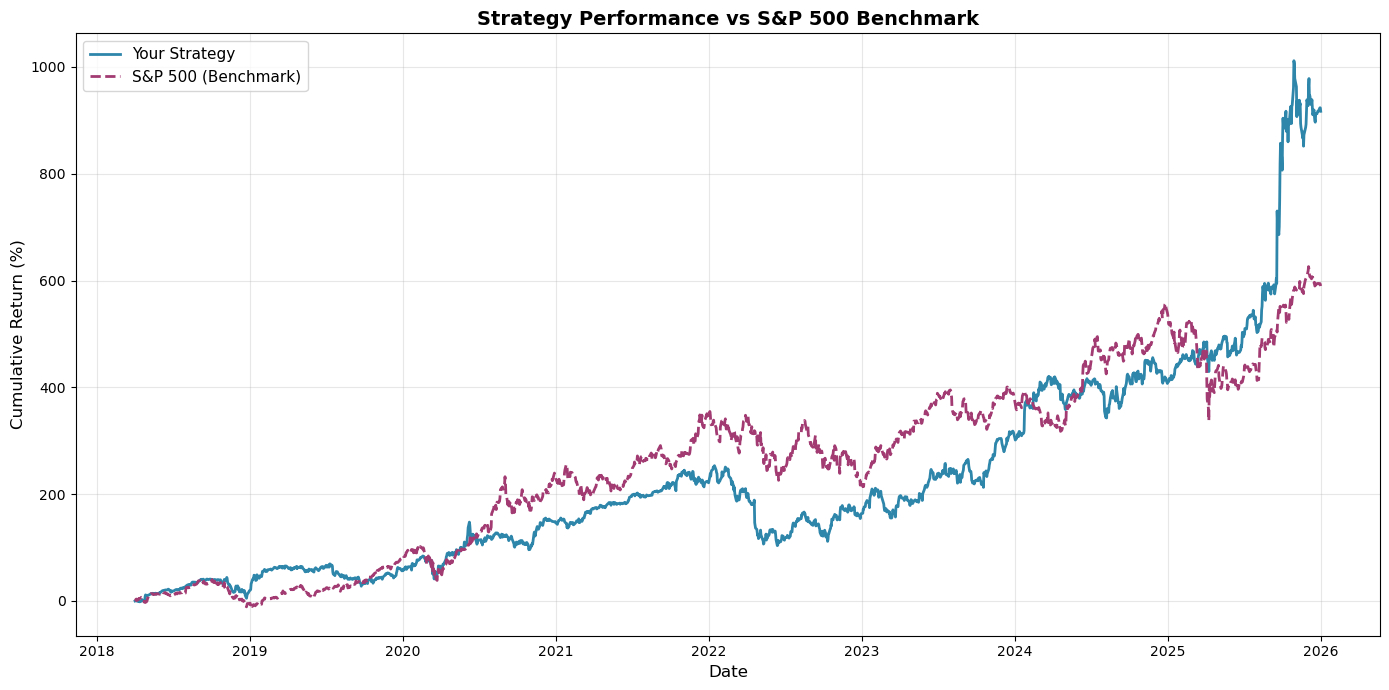

In [190]:
# =============================================================================
# DISPLAY RESULTS
# =============================================================================

# Print performance summary
print("\n")
print_performance_summary(results)

# Plot cumulative returns
print("\nGenerating cumulative return chart...\n")
plot_cumulative_returns(results)